In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

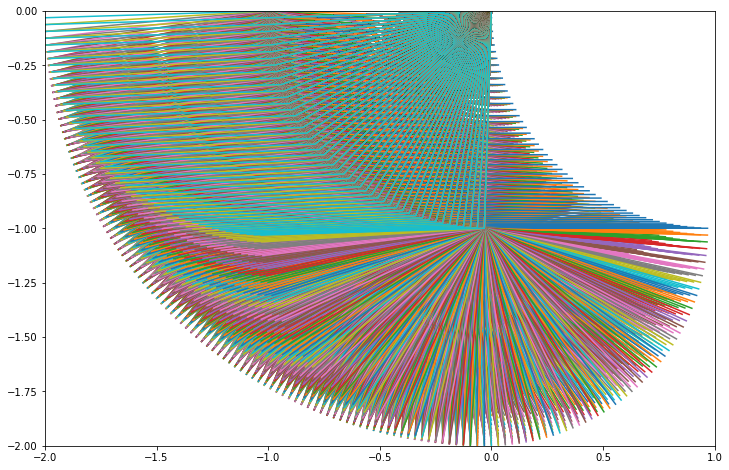

In [88]:
theta_shoulder = np.arange(0,math.pi/2,math.pi/100)
theta_elbow = np.arange(0,math.pi,math.pi/100)

joint1 = np.array([[-math.cos(theta),-math.sin(theta)] for theta in theta_shoulder])
joint2 = np.array([[-math.cos(theta),-math.sin(theta)] for theta in theta_elbow])

plt.figure(figsize=(12, 8))
plt.ylim(top=0,bottom=-2)
plt.xlim(-2,1)

for pos1 in joint1:
    for pos2 in joint2:
        final_pos = [pos1[0]-pos2[0],pos1[1]+pos2[1]]
        plt.plot([0,pos1[0],final_pos[0]],[0,pos1[1],final_pos[1]])

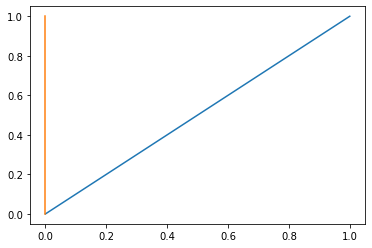

In [24]:
plt.plot([0,1],[0,1])
plt.plot([0,0],[0,1])

In [48]:
# 2D Inverse model based on https://www.adham-e.dev/pdf/IK_Model.pdf

In [143]:
def inverse_xy(x,y,l_s,l_e):
    d = math.sqrt(x**2+y**2)
    q = math.acos(x/d)
    theta_s = math.acos((l_s**2 + d**2 - l_e**2)/(2*l_s*d))-q
    theta_e = math.acos((l_e**2 + l_s**2 - d**2)/(2*l_e*l_e))-math.pi/2+theta_s
    return [theta_s, theta_e]

def display_inverse(t):
    output = np.array([[-math.cos(theta),-math.sin(theta)] for theta in t])
    output[1] = [output[0][0]+output[1][1],output[0][1]-output[1][0]]
    plt.figure(figsize=(8, 8))
    plt.ylim(top=0.1,bottom=-2)
    plt.xlim(-1.1,1.1)
    plt.plot([0,output[0][0],output[1][0]],[0,-output[0][1],-output[1][1]],'-bo',markersize=10)
    plt.plot([output[1][0]],[-output[1][1]], 'ro',markersize=10)

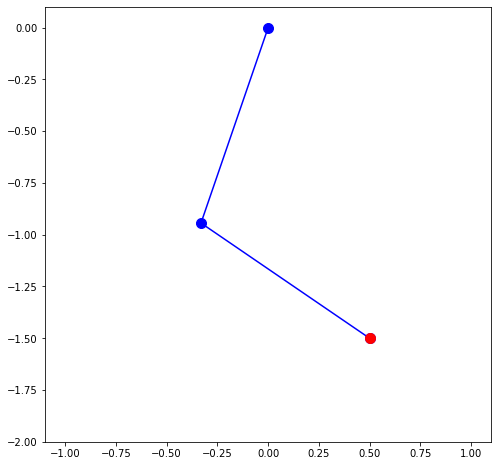

In [144]:
t = inverse_xy(-0.5,1.5,1,1)
display_inverse(t)